# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average
    2. The SPY closes at a X-day low, buy some shares.
       If it falls further, buy some more, etc...
    3. If the SPY closes at a X-day high, sell your entire long position.
    
    (Scaling in)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
end = datetime.datetime.now()

Define high low trade periods

In [4]:
period = 7

Define max number of positions to scale into

In [5]:
max_positions = 1

Define the margin multiple

In [6]:
margin = 1

Run Strategy

In [7]:
s = strategy.Strategy(symbol, capital, start, end, stop_loss_pct=85, margin=margin,
                      period=period, max_positions=max_positions)
s.run()

Retrieve log DataFrames

In [8]:
rlog, tlog, dbal = s.get_logs()
stats = s.get_stats()

In [9]:
s.rlog.tail(10)

,date,seq_num,price,shares,entry_exit,direction,symbol
534,2020-12-11,534,366.30,165,entry,LONG,SPY
535,2020-12-16,535,370.17,165,exit,LONG,SPY
536,2021-01-15,536,375.70,162,entry,LONG,SPY
537,2021-01-20,537,383.89,162,exit,LONG,SPY
538,2021-01-27,538,374.41,167,entry,LONG,SPY
539,2021-02-04,539,386.19,167,exit,LONG,SPY
540,2021-02-19,540,390.03,165,entry,LONG,SPY
541,2021-03-10,541,389.58,165,exit,LONG,SPY
542,2021-03-19,542,389.48,165,entry,LONG,SPY
543,2021-03-26,543,395.98,165,exit,LONG,SPY


In [10]:
tlog.tail(10)

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
262,2020-01-27,323.50,2020-02-04,329.06,5.56,1089.76,196,54714.21,LONG,SPY
263,2020-02-21,333.48,2020-03-04,312.86,-20.62,-4000.28,194,50713.92,LONG,SPY
264,2020-06-24,304.09,2020-07-02,312.23,8.14,1619.86,199,52333.78,LONG,SPY
265,2020-09-03,345.39,2020-09-28,334.19,-11.20,-2016.00,180,50317.78,LONG,SPY
266,2020-10-19,342.01,2020-11-04,343.54,1.53,269.28,176,50587.06,LONG,SPY
267,2020-12-11,366.30,2020-12-16,370.17,3.87,638.55,165,51225.62,LONG,SPY
268,2021-01-15,375.70,2021-01-20,383.89,8.19,1326.78,162,52552.40,LONG,SPY
269,2021-01-27,374.41,2021-02-04,386.19,11.78,1967.26,167,54519.66,LONG,SPY
270,2021-02-19,390.03,2021-03-10,389.58,-0.45,-74.25,165,54445.40,LONG,SPY
271,2021-03-19,389.48,2021-03-26,395.98,6.50,1072.50,165,55517.90,LONG,SPY


In [11]:
dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2021-03-22,65202.75,64526.25,64958.55,165,181.20,1.00,-
2021-03-23,65102.10,64310.10,64448.70,165,181.20,1.00,-
2021-03-24,64984.95,64113.75,64122.00,165,181.20,1.00,-
2021-03-25,64621.95,63524.70,64481.70,165,181.20,1.00,-
2021-03-26,65517.90,65517.90,65517.90,0,65517.90,1.00,X


Generate strategy stats - display all available stats

In [12]:
pf.print_full(stats)

start                                                   1993-11-11
end                                                     2021-03-26
beginning_balance                                            10000
ending_balance                                            65517.90
total_net_profit                                          55517.90
gross_profit                                             102799.24
gross_loss                                               -47281.33
profit_factor                                                 2.17
return_on_initial_capital                                   555.18
annual_return_rate                                            7.11
trading_period                           27 years 4 months 15 days
pct_time_in_market                                           29.73
margin                                                           1
avg_leverage                                                  1.00
max_leverage                                                  

Equity curve

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [13]:
benchmark = pf.Benchmark(symbol, capital, s.start, s.end)
benchmark.run()

Plot Equity Curves: Strategy vs Benchmark

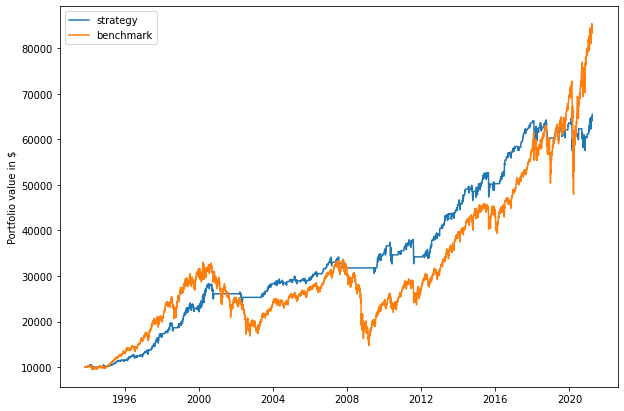

In [14]:
pf.plot_equity_curve(dbal, benchmark=benchmark.dbal)

Plot Trades

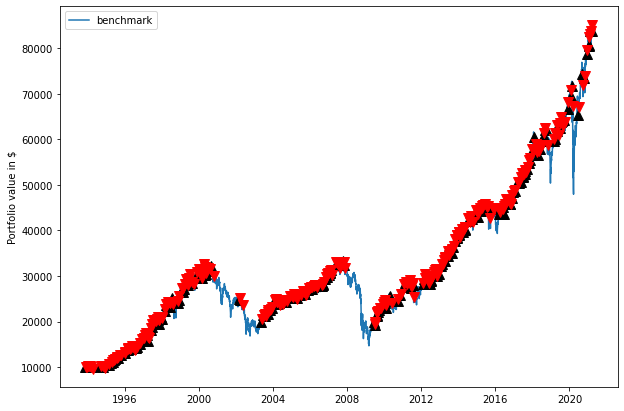

In [15]:
pf.plot_trades(dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,7.11,8.14
max_closed_out_drawdown,-14.63,-56.42
annualized_return_over_max_drawdown,0.49,0.14
best_month,12.88,23.06
worst_month,-13.54,-31.38
sharpe_ratio,0.74,0.51
sortino_ratio,0.55,0.64
monthly_std,2.12,4.52
annual_std,9.03,16.55


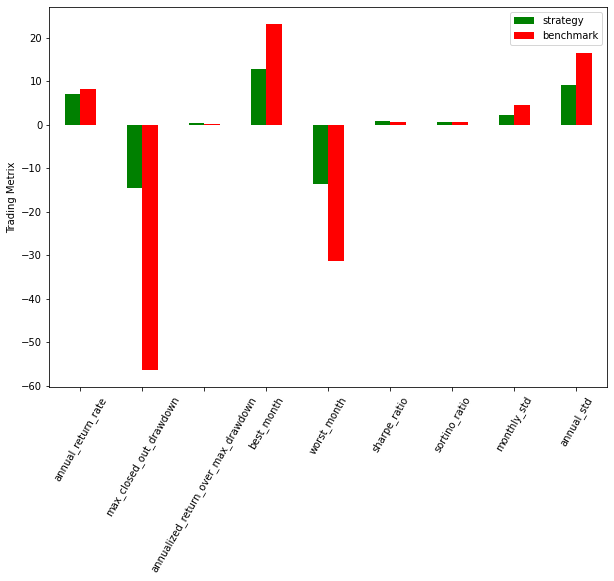

In [16]:
df = pf.plot_bar_graph(stats, benchmark.stats)
df